In [1]:
%matplotlib inline
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import time
import matplotlib.dates as md
from scipy import fftpack

# Second Based Dataset

In [2]:
df_nov20_1s = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/nov20_data/seb_1s_class_t_nov20.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_nov20_1s['Timestamp'] = pd.to_datetime(df_nov20_1s['Timestamp'],unit='s')
df_nov20_1s[0:5]

,1W-2_12,1W-2_03,1W-2_15,Timestamp,Label
0,0.000295,0.001028,0.000767,2017-11-20 00:12:33,0
1,0.000193,0.000861,0.000821,2017-11-20 00:12:34,0
2,0.000256,0.000913,0.000788,2017-11-20 00:12:35,0
3,0.000203,0.000893,0.000811,2017-11-20 00:12:36,0
4,0.000201,0.000815,0.000733,2017-11-20 00:12:37,0


In [3]:
df_nov20_1s.shape

(86400, 5)

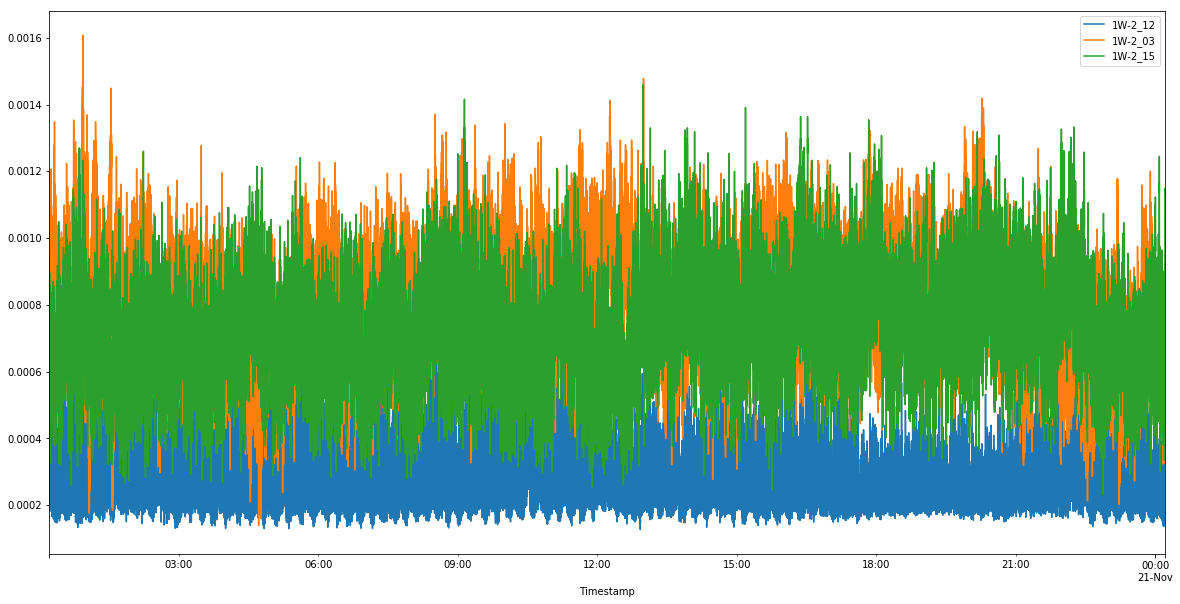

In [4]:
df_nov20_1s.plot(x='Timestamp',  y = ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Minute Based Dataset

In [5]:
df_nov20_1m = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/nov20_data/seb_1min_class_t_nov20.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_nov20_1m['Timestamp'] = pd.to_datetime(df_nov20_1m['Timestamp'],unit='s')

In [6]:
# select Nov.20 data
df_nov20_1m[0:5]

,1W-2_12,1W-2_03,1W-2_15,Timestamp,Label
0,0.000280,0.000908,0.000729,2017-11-20 00:12:33,0
1,0.000325,0.000931,0.000588,2017-11-20 00:13:33,0
2,0.000384,0.000909,0.000681,2017-11-20 00:14:33,0
3,0.000312,0.000827,0.000602,2017-11-20 00:15:33,0
4,0.000315,0.000821,0.000559,2017-11-20 00:16:33,0


In [7]:
df_nov20_1m.shape

(1440, 5)

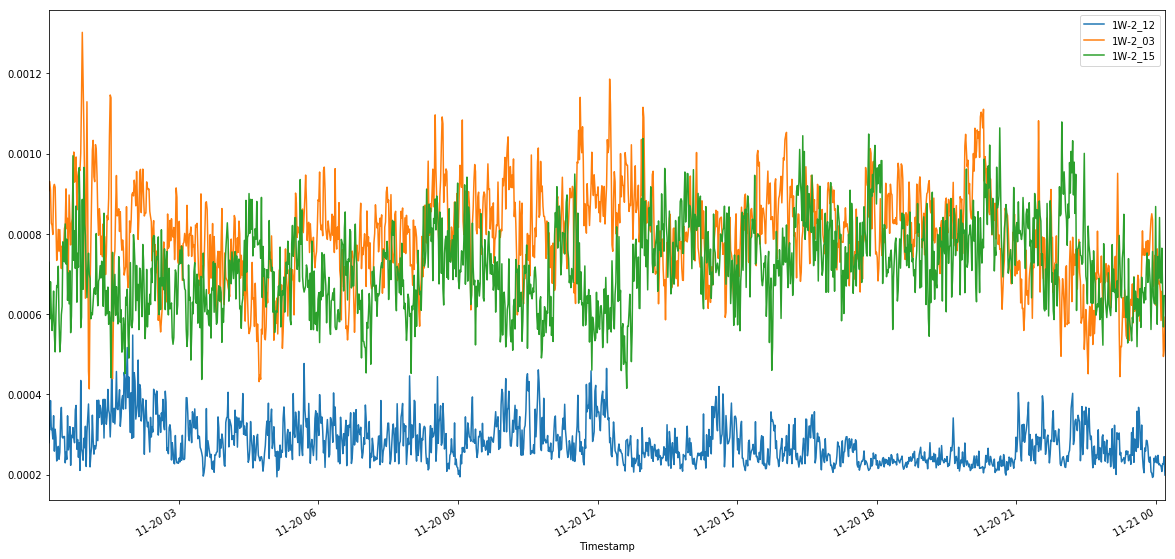

In [8]:
df_nov20_1m.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Second Based Baseline Dataset

In [9]:
df_base_1s = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/baseline-data/seb_1s_baseline.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_base_1s['Timestamp'] = pd.to_datetime(df_base_1s['Timestamp'],unit='s')

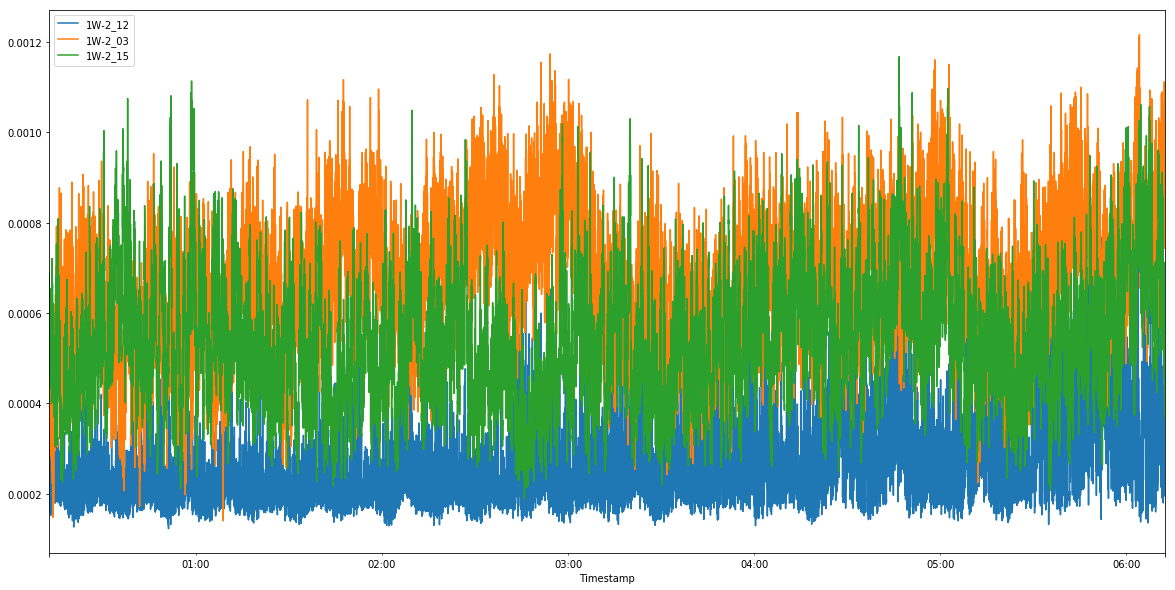

In [10]:
df_base_1s.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Average to 5 min and 10 min

In [11]:
df_base_1s.iloc[0][2]

0.00051287608221173286

In [12]:
def avg_from_avg1min(d_1min,time_scale):
    d_5min = []
    for i in range(0,int(1440/time_scale)):
        ch1_avg = 0
        ch2_avg = 0
        ch3_avg = 0
        for j in range(0,time_scale):
            ch1_avg += d_1min.iloc[i*time_scale+j][0]
            ch2_avg += d_1min.iloc[i*time_scale+j][1]
            ch3_avg += d_1min.iloc[i*time_scale+j][2]
        d_5min.append([ch1_avg,ch2_avg,ch3_avg,d_1min.iloc[i*time_scale][3]])
    return pd.DataFrame(d_5min, columns=['1W-2_12','1W-2_03','1W-2_15','Timestamp'])

df_nov20_5m = avg_from_avg1min(df_nov20_1m, 5)

In [13]:
df_nov20_5m.shape

(288, 4)

In [14]:
df_nov20_5m[0:5]

,1W-2_12,1W-2_03,1W-2_15,Timestamp
0,0.001616,0.004395,0.003159,2017-11-20 00:12:33
1,0.001500,0.004381,0.002903,2017-11-20 00:17:33
2,0.001241,0.003872,0.003148,2017-11-20 00:22:33
3,0.001581,0.003771,0.003280,2017-11-20 00:27:33
4,0.001364,0.004199,0.003702,2017-11-20 00:32:33


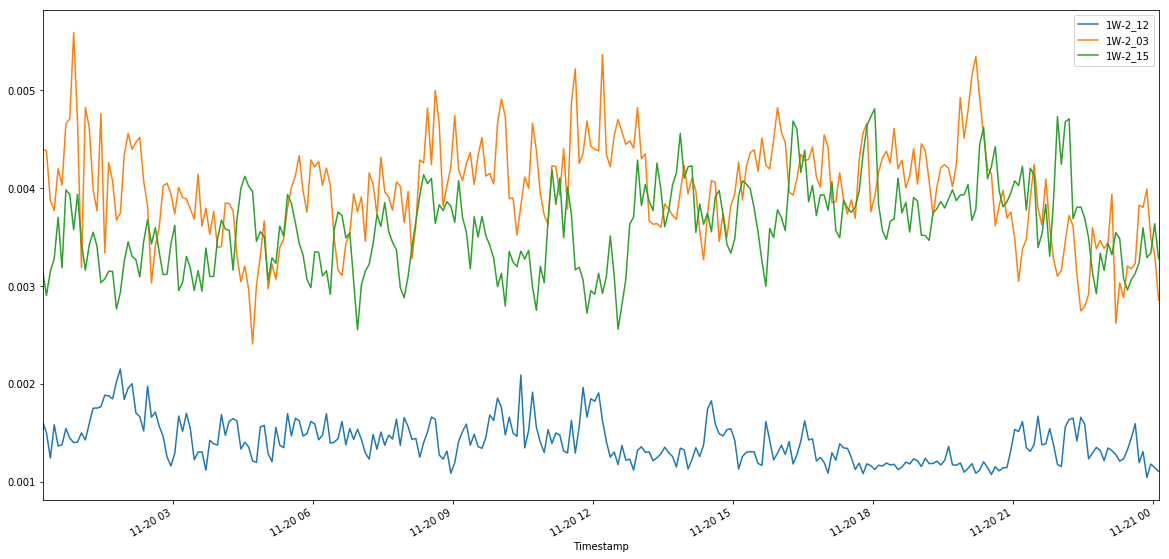

In [15]:
df_nov20_5m.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

In [16]:
df_nov20_10m = avg_from_avg1min(df_nov20_1m, 10)
df_nov20_10m.shape

(144, 4)

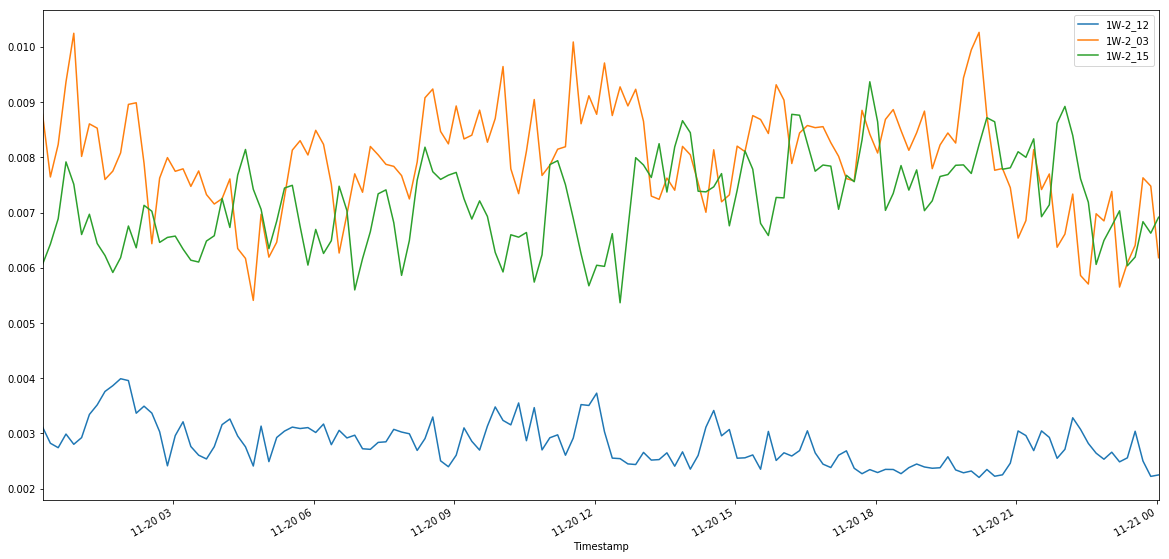

In [17]:
df_nov20_10m.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Minute Based Baseline Dataset

In [18]:
df_base_1m = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/baseline-data/seb_1min_baseline.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_base_1m['Timestamp'] = pd.to_datetime(df_base_1m['Timestamp'],unit='s')
df_base_1m[0:5]

,1W-2_12,1W-2_03,1W-2_15,Timestamp,Label
0,0.000220,0.000433,0.000555,2017-11-23 00:12:33,0
1,0.000231,0.000382,0.000501,2017-11-23 00:13:33,0
2,0.000231,0.000540,0.000511,2017-11-23 00:14:33,0
3,0.000216,0.000609,0.000460,2017-11-23 00:15:33,0
4,0.000233,0.000526,0.000352,2017-11-23 00:16:33,0


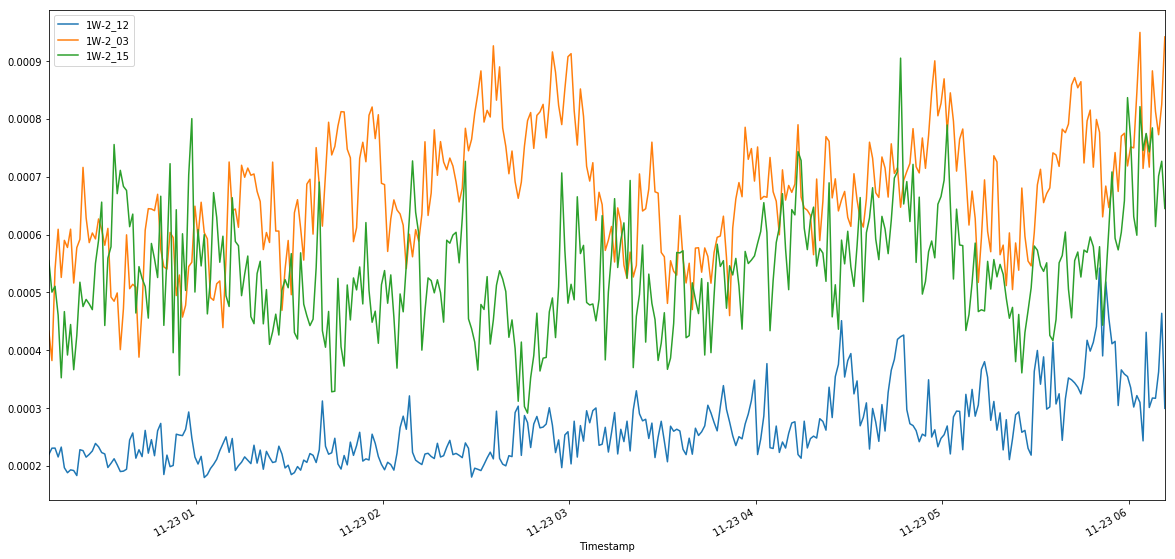

In [19]:
df_base_1m.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Anomaly Detection

### Reference: http://amid.fish/anomaly-detection-with-k-means-clustering

In [20]:
from sklearn.cluster import KMeans
import learn_utils

In [21]:
def plot_waves(waves, step):
    """
    Plot a set of 9 waves from the given set, starting from the first one
    and increasing in index by 'step' for each subsequent graph
    """
    plt.figure()
    n_graph_rows = 3
    n_graph_cols = 3
    graph_n = 1
    wave_n = 0
    for _ in range(n_graph_rows):
        for _ in range(n_graph_cols):
            axes = plt.subplot(n_graph_rows, n_graph_cols, graph_n)
            axes.set_ylim([-0.0006, 0.0006])
            plt.plot(waves[wave_n])
            graph_n += 1
            wave_n += step
    # fix subplot sizes so that everything fits
    plt.tight_layout()
    plt.show()

In [22]:
def sliding_chunker(data, window_len, slide_len):
    """
    Split a list into a series of sub-lists, each sub-list window_len long,
    sliding along by slide_len each time. If the list doesn't have enough
    elements for the final sub-list to be window_len long, the remaining data
    will be dropped.

    e.g. sliding_chunker(range(6), window_len=3, slide_len=2)
    gives [ [0, 1, 2], [2, 3, 4] ]
    """
    chunks = []
    for pos in range(0, len(data), slide_len):
        chunk = np.copy(data[pos:pos+window_len])
        if len(chunk) != window_len:
            continue
        chunks.append(chunk)
    print("From dataset length %d" % len(data))
    print("Produced %d chunks" % len(chunks))
    return chunks

def reconstruct(data, window, clusterer):
    """
    Reconstruct the given data using the cluster centers from the given
    clusterer.
    """
    window_len = len(window)
    slide_len = int(window_len/2)
    segments = sliding_chunker(data, window_len, slide_len)
    reconstructed_data = np.zeros(len(data))
    for segment_n, segment in enumerate(segments):
        # window the segment so that we can find it in our clusters which were
        # formed from windowed data
        segment *= window
        nearest_match_idx = clusterer.predict([segment])[0]
        nearest_match = np.copy(clusterer.cluster_centers_[nearest_match_idx])
        #print(nearest_match.shape)
        pos = segment_n * slide_len
        reconstructed_data[pos:pos+window_len] += nearest_match

    return reconstructed_data

## Windowing Data

Here, we are going to divide our data into segments. Then we will normalize them into a sin wave for better understanding. 

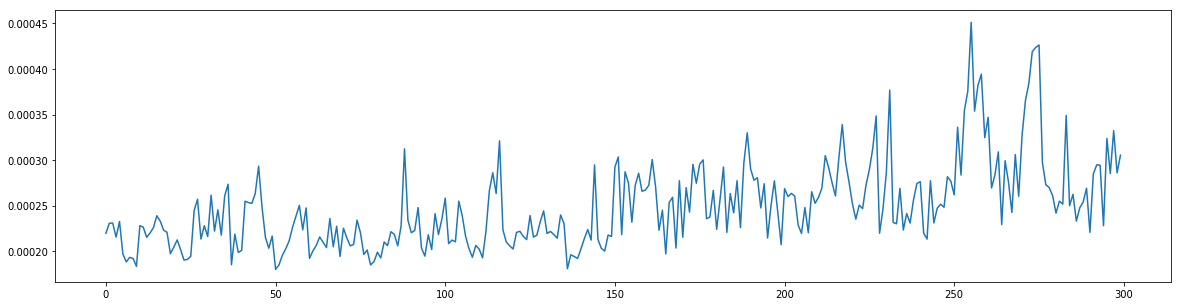

In [23]:
segment_len = 20
slide_len = 2
segments = []
df = df_base_1m['1W-2_12']
df.shape
df[0:5]
plt.figure(figsize=(20, 5))
plt.plot(df[0:300])

In [24]:
df = df[0:200]
df.shape

(200,)

In [25]:
for start_pos in range(0, len(df), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(df[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)
print("From dataset length %d" % len(df))
print("Produced %d waveform segments" % len(segments))

From dataset length 200
Produced 91 waveform segments


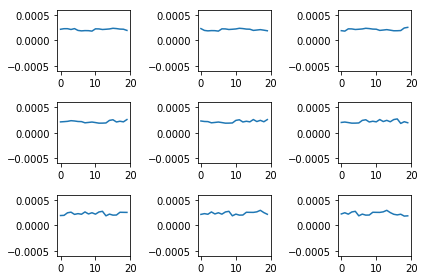

In [26]:
plot_waves(segments, step=2)

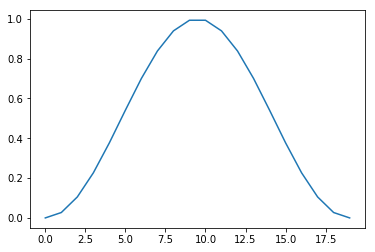

In [27]:
window_rads = np.linspace(0, np.pi, segment_len)
window = np.sin(window_rads)**2
plt.plot(window)
plt.show()

Here is the sin wave we are going to apply

In [28]:
windowed_segments = []
for segment in segments:
    windowed_segment = np.copy(segment) * window
    windowed_segments.append(windowed_segment)
print("Windowed_seg length:%d" % len(windowed_segments))

Windowed_seg length:91


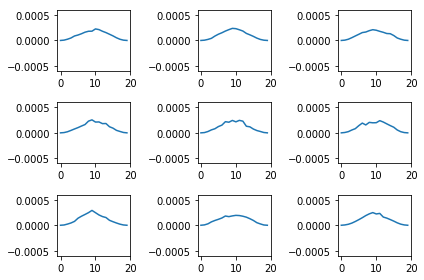

In [29]:
plot_waves(windowed_segments, step=3)

Windowed segments

## Clustering

Here we use KMeans to do the clustering and take the centroids as learned segements

In [30]:
clusterer = KMeans(n_clusters=50)
clusterer.fit(windowed_segments)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

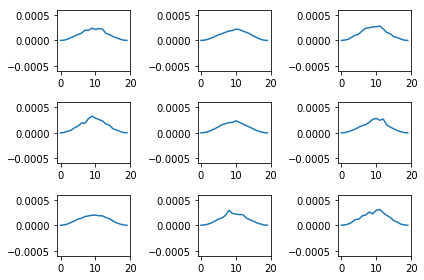

In [31]:
plot_waves(clusterer.cluster_centers_, step=4)

Clustered and centroided segments

## Reconstruction

In [32]:
slide_len = int(segment_len/2)
test_segments = sliding_chunker(
    df,
    window_len=segment_len,
    slide_len=slide_len
)

From dataset length 200
Produced 19 chunks


In [33]:
centroids = clusterer.cluster_centers_
segment = np.copy(test_segments[0])

# remember, the clustering was set up using the windowed data
# so to find a match, we should also window our search key
windowed_segment = segment * window
print("Windowed_seg length:%d" % len(windowed_segments))


Windowed_seg length:91


### Segment Test

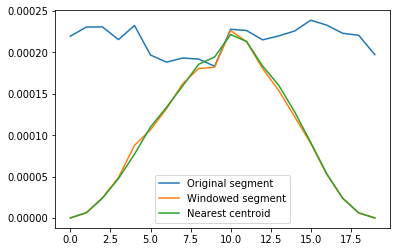

In [34]:
# predict() returns a list of centres to cope with the possibility of multiple
# samples being passed
nearest_centroid_idx = clusterer.predict([windowed_segment])[0]
nearest_centroid = np.copy(centroids[nearest_centroid_idx])
plt.figure()
plt.plot(segment, label="Original segment")
plt.plot(windowed_segment, label="Windowed segment")
plt.plot(nearest_centroid, label="Nearest centroid")
plt.legend()
plt.show()

### Reconstruction Test

In [35]:
print(len(test_segments[0]))
print(len(df))

reconstruction = np.zeros(len(df))
slide_len = int(segment_len/2)
print(len(reconstruction))

20
200
200


In [36]:
for segment_n, segment in enumerate(test_segments):
    # don't modify the data in segments
    segment = np.copy(segment)
    segment *= window
    #print(segment_n)
    nearest_centroid_idx = clusterer.predict([segment])[0]
    centroids = clusterer.cluster_centers_
    nearest_centroid = np.copy(centroids[nearest_centroid_idx])
    
    # overlay our reconstructed segments with an overlap of half a segment
    pos = segment_n * slide_len
    reconstruction[pos:pos+segment_len] += nearest_centroid


Maximum reconstruction error was 0.000022
98th percentile of reconstruction error was 0.000011


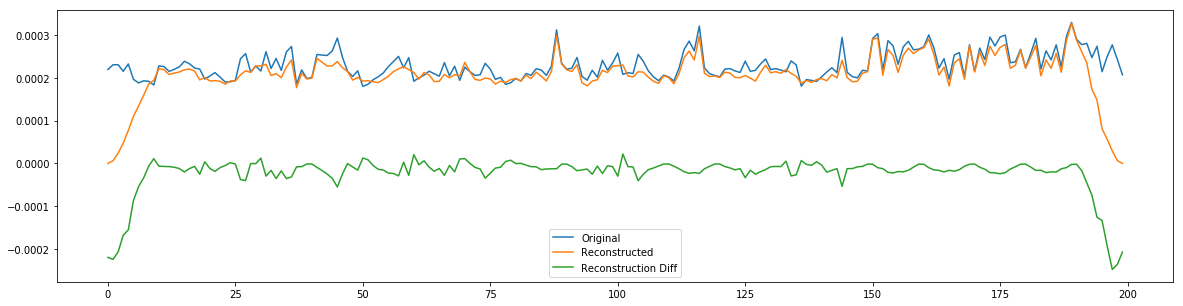

In [37]:
n_plot_samples = 360
error = reconstruction[0:n_plot_samples] - df[0:n_plot_samples]
error_98th_percentile = np.percentile(error, 98)
print("Maximum reconstruction error was %f" % error.max())
print("98th percentile of reconstruction error was %f" % error_98th_percentile)
plt.figure(figsize=(20, 5))
plt.plot(df[0:n_plot_samples], label="Original")
plt.plot(reconstruction[0:n_plot_samples], label="Reconstructed")
plt.plot(error[0:n_plot_samples], label="Reconstruction Diff")
plt.legend()
plt.show()

We could see that the reconstructed graph fit the original well

# Anomaly Detection

In [38]:
df_anomalous = np.copy(df_nov20_1m["1W-2_12"])
#df_anomalous[210:215] = 0
reconstruction = reconstruct(df_anomalous, window, clusterer)

From dataset length 1440
Produced 143 chunks


Maximum reconstruction error was 0.000060
98th percentile of reconstruction error was 0.000034


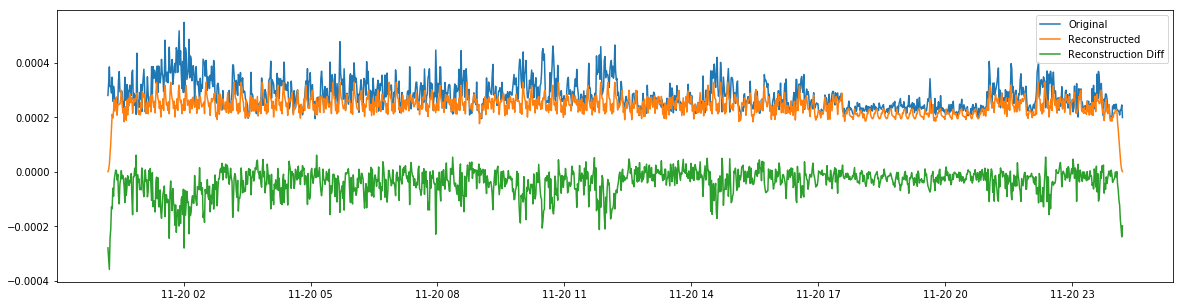

In [39]:
n_plot_samples = 1440   
error = reconstruction[0:n_plot_samples] - df_anomalous[0:n_plot_samples]
error_98th_percentile = np.percentile(error, 98)
print("Maximum reconstruction error was %f" % error.max())
print("98th percentile of reconstruction error was %f" % error_98th_percentile)
plt.figure(figsize=(20, 5))
plt.plot(df_nov20_1m["Timestamp"][0:n_plot_samples],df_anomalous[0:n_plot_samples], label="Original")
plt.plot(df_nov20_1m["Timestamp"][0:n_plot_samples],reconstruction[0:n_plot_samples], label="Reconstructed")
plt.plot(df_nov20_1m["Timestamp"][0:n_plot_samples],error[0:n_plot_samples], label="Reconstruction Diff")
plt.legend()
plt.show()

We take the absolute value of differences and filter out some low differences

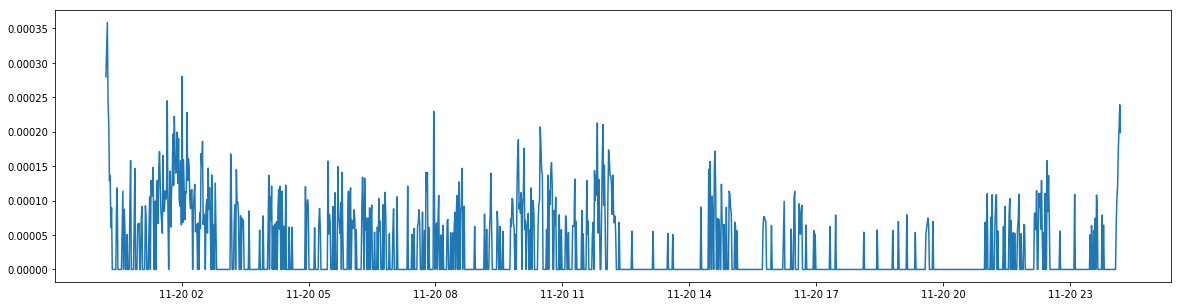

In [40]:
abs_diff = abs(error[0:n_plot_samples])
filtered = []
for i in abs_diff:
    if i < 0.00005:
        filtered.append(0)
    else:
        filtered.append(i)
import matplotlib.dates as mdates        
plt.figure(figsize=(20, 5))
ax = plt.axes()
plt.plot(df_nov20_1m["Timestamp"][0:n_plot_samples],filtered[0:n_plot_samples], label="filtered")

# Anomaly Detection for minute based data

From dataset length 360
Produced 171 waveform segments
Windowed_seg length:171
From dataset length 360
Produced 35 chunks
From dataset length 1440
Produced 143 chunks
Maximum reconstruction error was 0.000117
98th percentile of reconstruction error was 0.000049


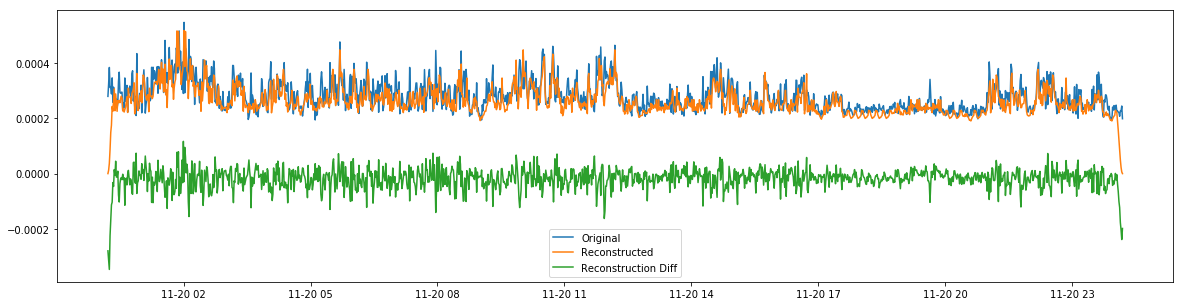

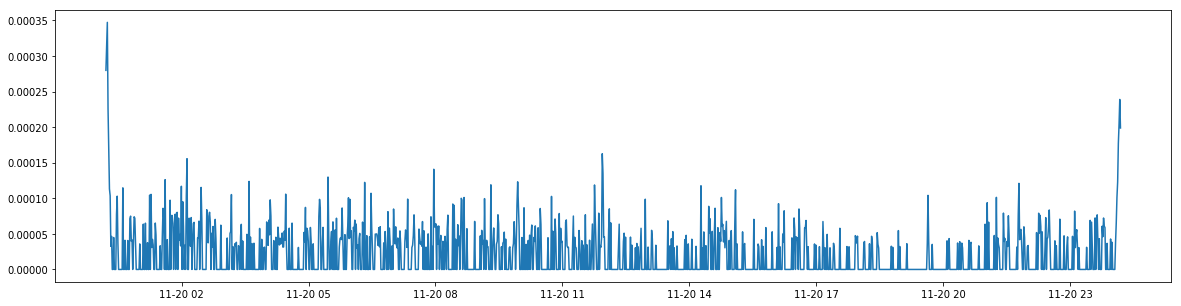

In [178]:
import my_anomaly
df = np.copy(df_base_1m['1W-2_12'])
df_a = np.copy(df_nov20_1m["1W-2_12"])
r_ch1 = my_anomaly.my_anomaly(df, df_a,df_nov20_1m["Timestamp"], 0.00003,20,2,1440,50)

From dataset length 360
Produced 171 waveform segments
Windowed_seg length:171
From dataset length 360
Produced 35 chunks
From dataset length 1440
Produced 143 chunks
Maximum reconstruction error was 0.000297
98th percentile of reconstruction error was 0.000076


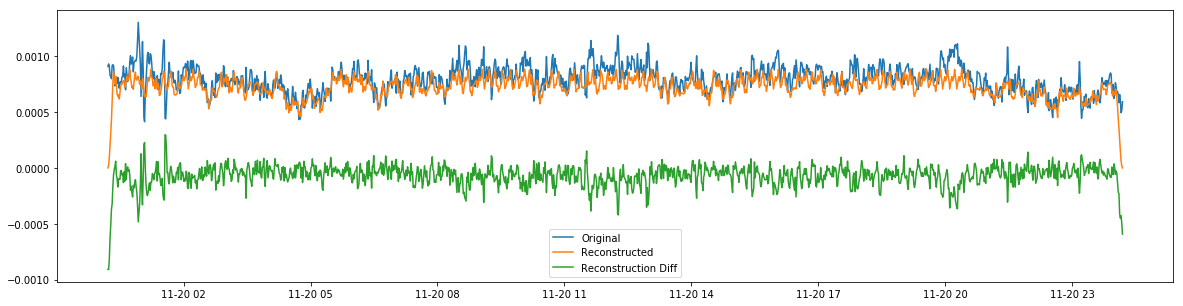

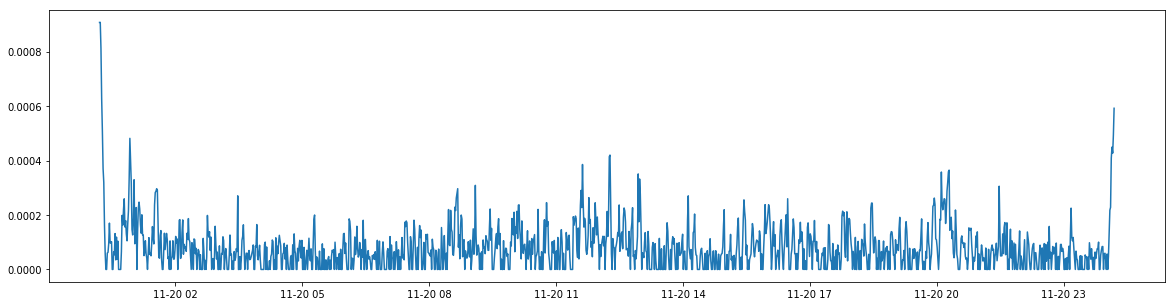

In [179]:
df = np.copy(df_base_1m['1W-2_03'])
df_a = np.copy(df_nov20_1m["1W-2_03"])
r_ch2 = my_anomaly.my_anomaly(df, df_a,df_nov20_1m["Timestamp"], 0.00003,20,2,1440,50)

From dataset length 360
Produced 171 waveform segments
Windowed_seg length:171
From dataset length 360
Produced 35 chunks
From dataset length 1440
Produced 143 chunks
Maximum reconstruction error was 0.000156
98th percentile of reconstruction error was 0.000089


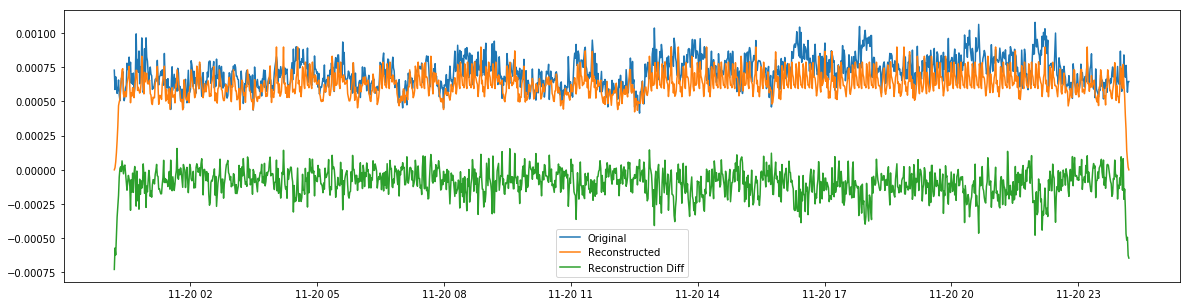

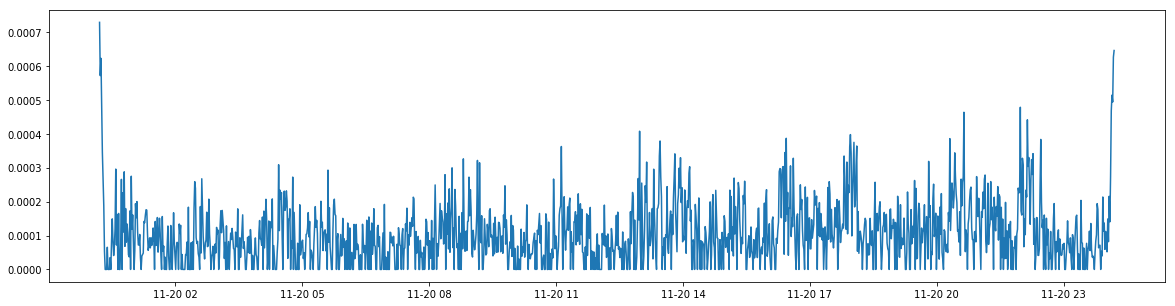

In [180]:
df = np.copy(df_base_1m['1W-2_15'])
df_a = np.copy(df_nov20_1m["1W-2_15"])
r_ch3 = my_anomaly.my_anomaly(df, df_a,df_nov20_1m["Timestamp"], 0.00003,20,2,1440,50)

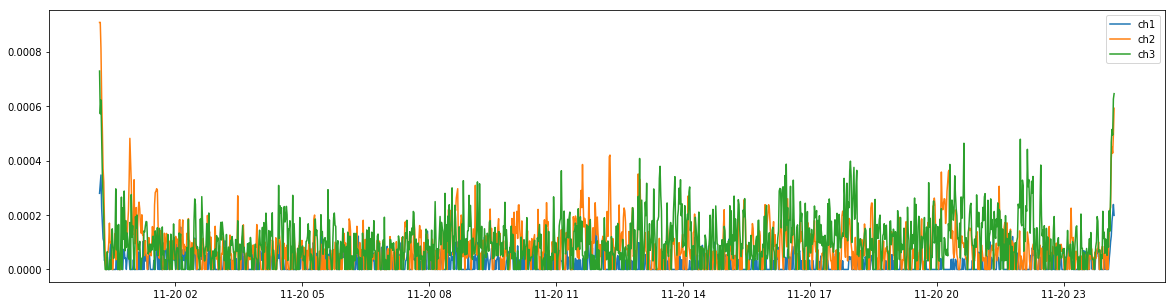

In [181]:
plt.figure(figsize=(20, 5))
plt.plot(df_nov20_1m["Timestamp"][0:n_plot_samples],r_ch1[0:n_plot_samples], label="ch1")
plt.plot(df_nov20_1m["Timestamp"][0:n_plot_samples],r_ch2[0:n_plot_samples], label="ch2")
plt.plot(df_nov20_1m["Timestamp"][0:n_plot_samples],r_ch3[0:n_plot_samples], label="ch3")
plt.legend()
plt.show()

### Overlay of 3 channel differerences

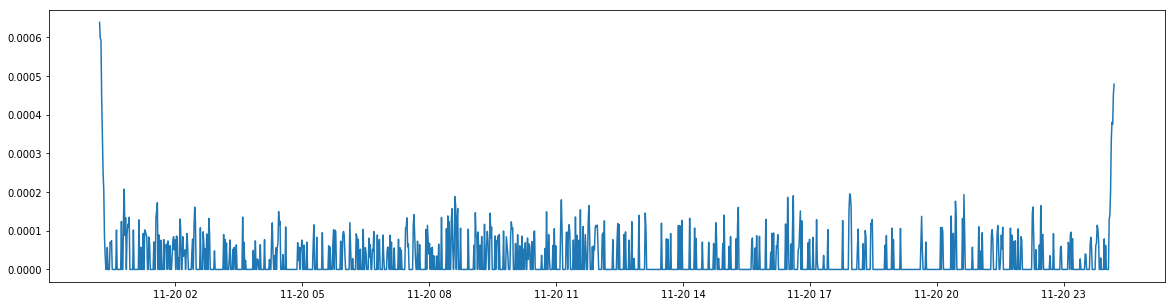

In [182]:
overlay_m = []
for i in range(0,1440):
    if  r_ch1[i] > 0 and r_ch2[i] > 0 and r_ch3[3] > 0:
        mean = (r_ch1[i] + r_ch2[i] +r_ch3[i])/3
        overlay_m.append(mean)
    else:
        overlay_m.append(0)
plt.figure(figsize=(20, 5))
ax = plt.axes()
plt.plot(df_nov20_1m["Timestamp"][0:1440],overlay_m[0:1440], label="overlay")

# Anomaly Detection for second based data

From dataset length 21600
Produced 10791 waveform segments
Windowed_seg length:10791
From dataset length 21600
Produced 2159 chunks
From dataset length 86400
Produced 8639 chunks
Maximum reconstruction error was 0.000237
98th percentile of reconstruction error was 0.000087


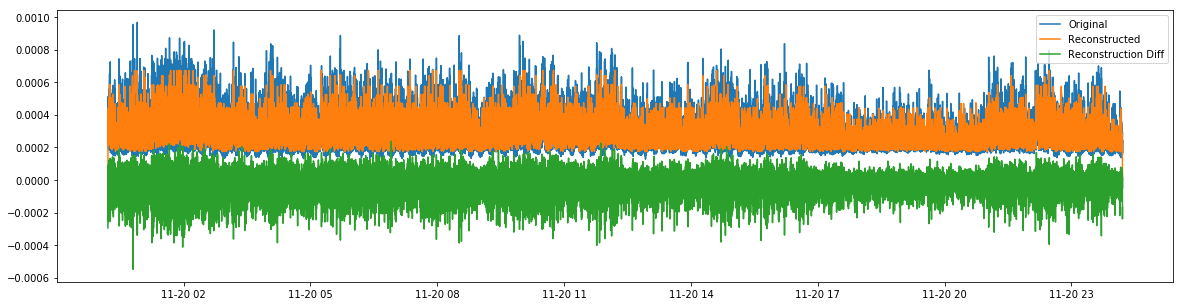

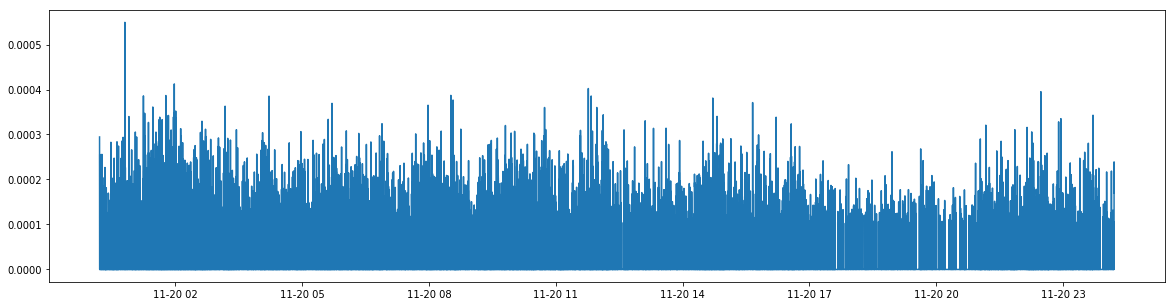

In [140]:
df = np.copy(df_base_1s['1W-2_12'])
df_a = np.copy(df_nov20_1s["1W-2_12"])
r_ch1 = my_anomaly.my_anomaly(df, df_a,df_nov20_1s["Timestamp"], 0.0001,20,2,86400,100)

From dataset length 21600
Produced 10791 waveform segments
Windowed_seg length:10791
From dataset length 21600
Produced 2159 chunks
From dataset length 86400
Produced 8639 chunks
Maximum reconstruction error was 0.000291
98th percentile of reconstruction error was 0.000097


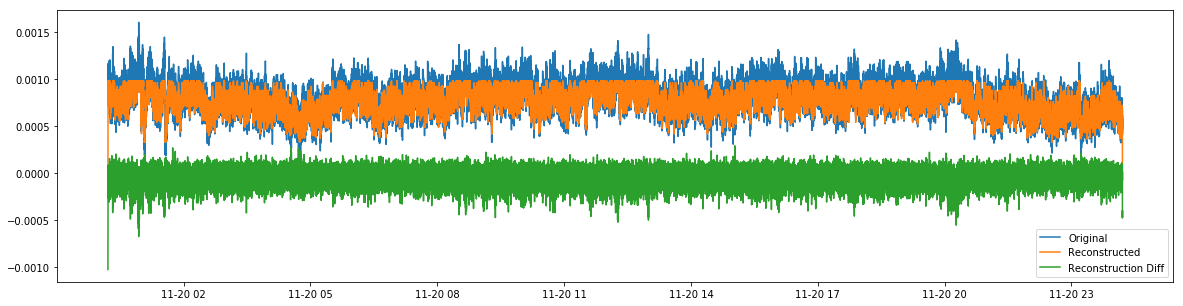

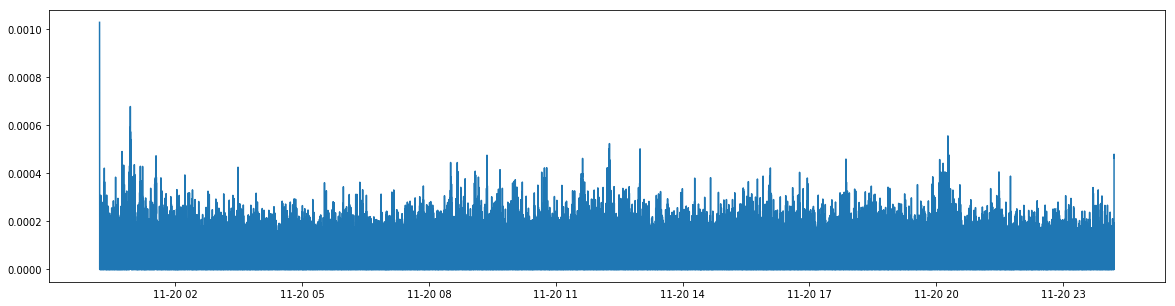

In [141]:
df = np.copy(df_base_1s['1W-2_03'])
df_a = np.copy(df_nov20_1s["1W-2_03"])
r_ch2 = my_anomaly.my_anomaly(df, df_a,df_nov20_1s["Timestamp"], 0.0001,20,2,86400,100)

From dataset length 21600
Produced 10791 waveform segments
Windowed_seg length:10791
From dataset length 21600
Produced 2159 chunks
From dataset length 86400
Produced 8639 chunks
Maximum reconstruction error was 0.000214
98th percentile of reconstruction error was 0.000081


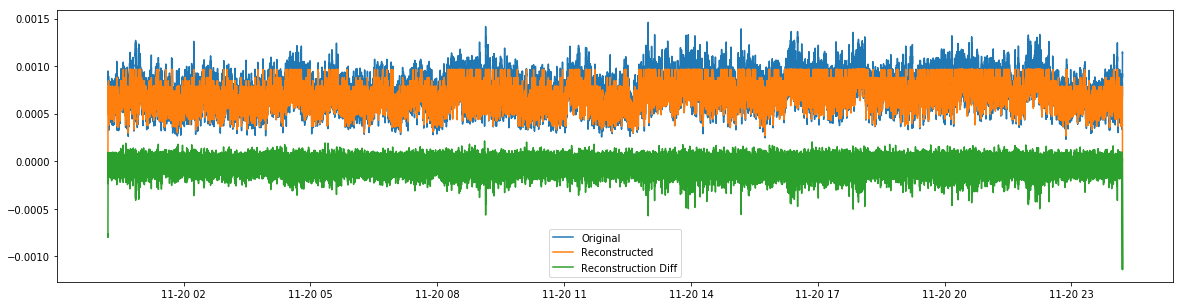

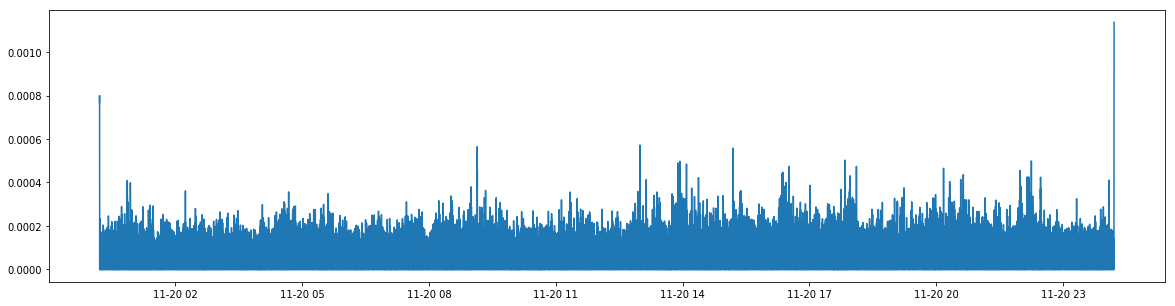

In [142]:
df = np.copy(df_base_1s['1W-2_15'])
df_a = np.copy(df_nov20_1s["1W-2_15"])
r_ch3 = my_anomaly.my_anomaly(df, df_a,df_nov20_1s["Timestamp"], 0.0001,20,2,86400,100)

### Overlay of 3 channel differerences

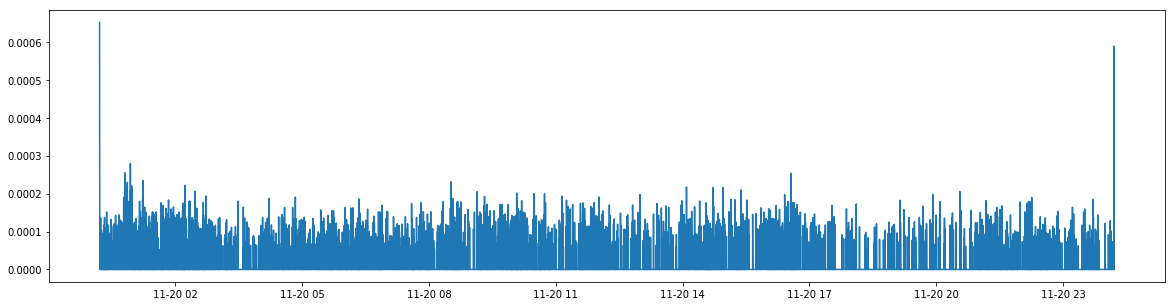

In [143]:
overlay_s = []
for i in range(0,86400 - 1):
    if  (r_ch1[i] > 0  or r_ch1[i+1] > 0) and (r_ch2[i] > 0 or r_ch2[i+1] > 0) and (r_ch3[i] > 0 or r_ch3[i+1] > 0):
        mean = (r_ch1[i] + r_ch2[i] + r_ch3[i] + r_ch1[i+1] + r_ch2[i+1] + r_ch3[i+1])/6
        overlay_s.append(mean)
    else:
        overlay_s.append(0)
overlay_s.append(0)

plt.figure(figsize=(20, 5))
ax = plt.axes()
plt.plot(df_nov20_1s["Timestamp"][0:86400],overlay_s[0:86400], label="overlay")

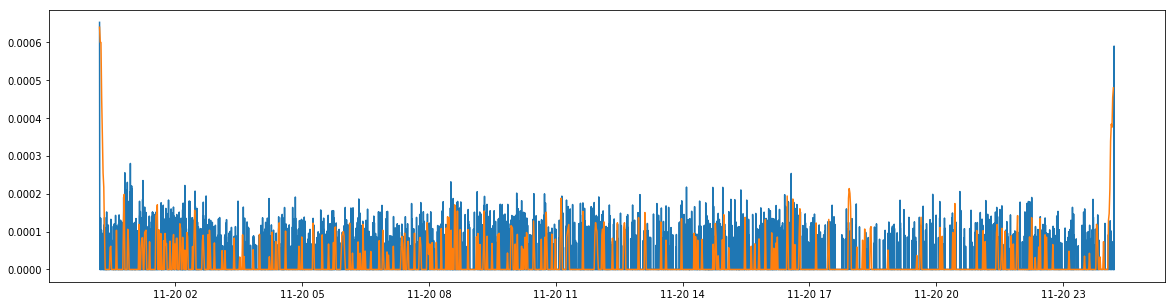

In [144]:
plt.figure(figsize=(20, 5))
ax = plt.axes()
plt.plot(df_nov20_1s["Timestamp"][0:86400], overlay_s[0:86400], label="second overlay")
plt.plot(df_nov20_1m["Timestamp"][0:1440], overlay_m[0:1440], label="minute overlay")

# Create new tagged dataset

In [145]:
import arrow

In [146]:
class_begin_period = [
    ["2017-11-20 07:45:00", "2017-11-20 08:05:00"],
    ["2017-11-20 08:50:00", "2017-11-20 09:05:00"],
    ["2017-11-20 09:55:00", "2017-11-20 10:15:00"],
    ["2017-11-20 11:00:00", "2017-11-20 11:20:00"],
    ["2017-11-20 12:05:00", "2017-11-20 12:20:00"],
    ["2017-11-20 13:10:00", "2017-11-20 13:20:00"],
    ["2017-11-20 14:15:00", "2017-11-20 14:35:00"],
    ["2017-11-20 15:45:00", "2017-11-20 16:05:00"],
    ["2017-11-20 18:45:00", "2017-11-20 19:05:00"],

]

In [147]:
df_nov20_1s["Timestamp"][0]
arrow.get(df_nov20_1s["Timestamp"][0])

<Arrow [2017-11-20T00:12:33+00:00]>

## Create 1 second tagged dataset

In [148]:
new_df_nov20_1s = np.copy(df_nov20_1s)

In [149]:
new_df_nov20_1s.shape
len(new_df_nov20_1s)

86400

In [154]:
arrow.get(new_df_nov20_1s[0][3])

<Arrow [2017-11-20T00:12:33+00:00]>

In [162]:
class_row_len = len(class_begin_period) # 
for i in range(0,len(new_df_nov20_1s)):
    current_time = arrow.get(new_df_nov20_1s[i][3])
    for j in range(0,class_row_len):
        p_start = arrow.get(class_begin_period[j][0])
        p_end = arrow.get(class_begin_period[j][1])
        if current_time >= p_start and current_time <= p_end and overlay_s[i]>0:
            new_df_nov20_1s[i][4] = 1
            #print("lable",current_time)
            break
        else:
            new_df_nov20_1s[i][4] = 0

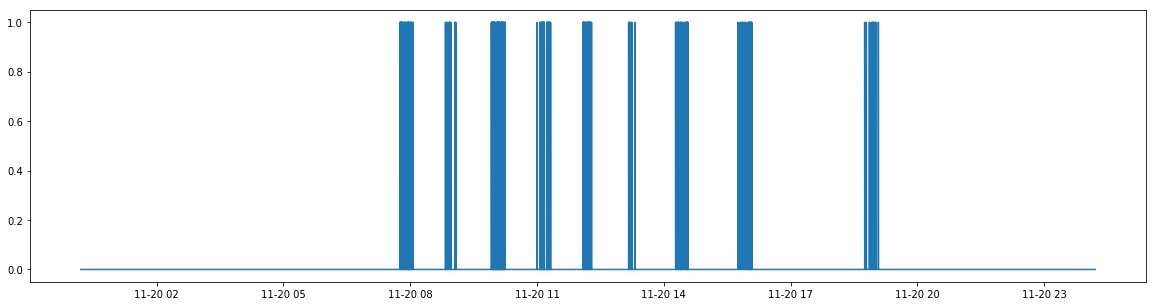

In [163]:
plt.figure(figsize=(20, 5))
ax = plt.axes()
plt.plot(df_nov20_1s["Timestamp"][0:86400], new_df_nov20_1s[:,4], label="lable period")

## Create 1 minute tagged dataset

In [183]:
new_df_nov20_1m = np.copy(df_nov20_1m)

class_row_len = len(class_begin_period) # 
for i in range(0,len(new_df_nov20_1m)):
    current_time = arrow.get(new_df_nov20_1m[i][3])
    for j in range(0,class_row_len):
        p_start = arrow.get(class_begin_period[j][0])
        p_end = arrow.get(class_begin_period[j][1])
        if current_time >= p_start and current_time <= p_end and overlay_m[i]>0:
            new_df_nov20_1m[i][4] = 1
            break
        else:
            new_df_nov20_1m[i][4] = 0

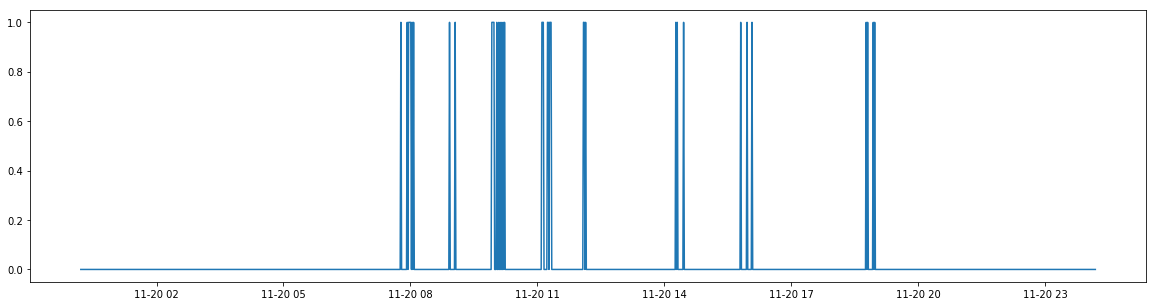

In [184]:
plt.figure(figsize=(20, 5))
ax = plt.axes()
plt.plot(df_nov20_1m["Timestamp"][0:1440], new_df_nov20_1m[:,4], label="lable period")